# Analysis of Global COVID-19 Confirmed Cases
Introduction

The dataset time_series_covid19_confirmed_global.csv from Johns Hopkins CSSE contains cumulative confirmed COVID-19 cases globally over time.
In this analysis, I will clean and reshape the data, and explore three questions:

> 1. How have confirmed cases grown over time globally?

> 2. Which countries have had the highest growth in recent months?

> 3. What is the day-over-day new cases trend for selected countries?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = ("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df = pd.read_csv(url)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


I started by loading the Johns Hopkins COVID-19 confirmed cases dataset. This dataset tracks cumulative confirmed cases worldwide from January 2020 onward, broken down by province/state and country/region.

In [45]:
df_long = df.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="date",
    value_name="cases"
)
# Convert date from string to datetime
df_long['date'] = pd.to_datetime(df_long['date'], format='%m/%d/%y')
df_long.head()

,Province/State,Country/Region,Lat,Long,date,cases
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0


I reshaped the dataset from wide format (with one column per date) to long format, where each row represents a single country on a specific date. I also converted the date column to proper datetime format, specifying the exact format (%m/%d/%y).

# Question 1: What was the global trend of cases over time?

In [46]:
global_ts = df_long.groupby('date')['cases'].sum().reset_index()

I summed cases across all countries for each date and plotted the global growth curve.

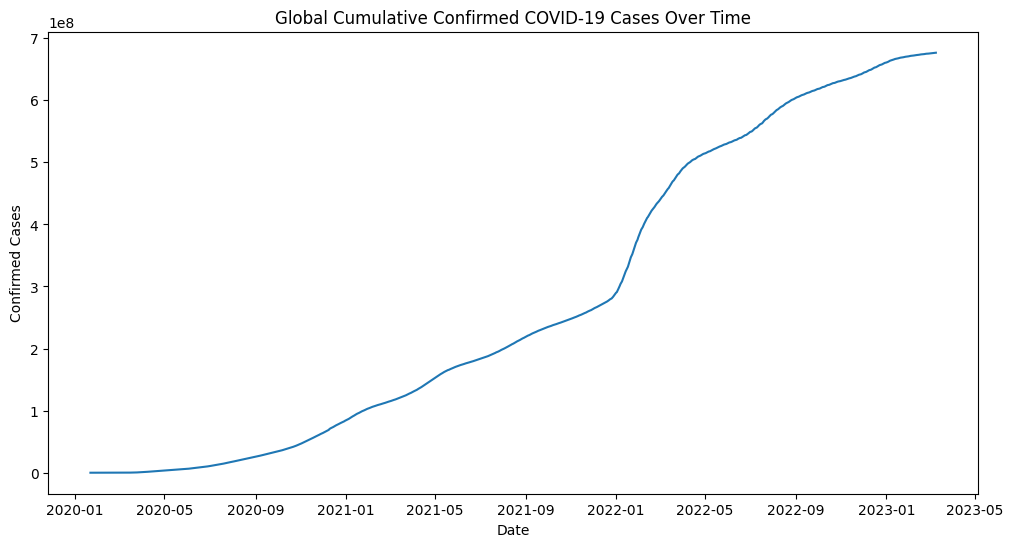

In [47]:
plt.figure(figsize=(12,6))
sns.lineplot(data=global_ts, x='date', y='cases')
plt.title("Global Cumulative Confirmed COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()

**Answer:** The chart highlights the slow rise during 2020, a steady increase in 2021, a sudden surge in 2022, with the rate stabilizing in 2023.

# Question 2: Which 5 countries had the highest rate of spread by March 2021?

In [48]:
# Define cutoff date
cutoff_date = "2021-03-31"

# Make a copy when filtering
df_cutoff = df_long[df_long["date"] <= cutoff_date].copy()

# Calculate daily new cases by country
df_cutoff["new_cases"] = df_cutoff.groupby("Country/Region")["cases"].diff().fillna(0)

# Calculate average daily new cases for each country
avg_spread = (
    df_cutoff.groupby("Country/Region")["new_cases"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
    .head(5)
)

I calculated the average daily new cases for each country up to the end of March 2021 and identified the countries with the highest spread.

In [49]:
avg_spread

Country/Region
US        70297.66
Brazil    29341.13
India     28095.78
Russia    10331.57
Italy      8241.15
Name: new_cases, dtype: float64

**Answer:** The five countries with the highest average daily new cases by March 2021 were the US, Brazil, India, Russia, and Italy, with the US leading at over 70,000 cases per day on average.

# Question 3: Which months had the highest increases in global cases?

In [50]:
# Create a 'year-month' column
df_long["year_month"] = df_long["date"].dt.to_period("M")

# Calculate daily new cases
df_long["new_cases"] = df_long.groupby("Country/Region")["cases"].diff().fillna(0)

# Aggregate new cases by month globally
monthly_cases = df_long.groupby("year_month")["new_cases"].sum().reset_index()

I aggregated daily new cases across all countries by month to identify periods with the largest global increases.

In [51]:
# Get top 5 months with the highest increases
top_months = monthly_cases.sort_values(by="new_cases", ascending=False).head(5)
top_months

,year_month,new_cases
24,2022-01,87136808.0
25,2022-02,56846495.0
26,2022-03,48874576.0
30,2022-07,28210775.0
23,2021-12,24919496.0


I summed the global new cases by month and sorted them to identify periods with the largest increases.

**Answer:** The five months with the highest global increases in COVID-19 cases were January 2022, February 2022, March 2022, July 2022, and December 2021, with January 2022 experiencing the largest surge at over 87 million new cases.